# 1. Install Required Packages (Optional)

In [1]:
# Install all required packages
# source("pkg.R")

# 2. Load Data (Q12005, Q22005)

In [1]:
# source("Classification_preprocess.R")
source("Classification_preprocess_equal.R")

In [2]:
# load data for Q12005
# 0.01 for sampling percentage
dummydata <- preprocess_classification("Q1", "2005", 0.01)
invisible(gc())
# summary(dummydata)
# str(dummydata)
# names(dummydata)
str(dummydata)

Read 25884838 rows and 23 (of 23) columns from 1.454 GB file in 00:00:52


Loading required package: ParamHelpers


'data.frame':	2185408 obs. of  23 variables:
 $ current_upb      : num  92750 165814 100470 83677 27041 ...
 $ loan_age         : int  22 28 134 26 60 17 0 91 6 89 ...
 $ mths_remng       : int  338 332 226 334 120 343 180 269 354 271 ...
 $ current_int_rt   : num  5.88 5.62 5.88 6.25 5.38 ...
 $ non_int_brng_upb : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mi_recoveries    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ net_sale_proceeds: num  0 0 0 0 0 0 0 0 0 0 ...
 $ non_mi_recoveries: num  0 0 0 0 0 0 0 0 0 0 ...
 $ expenses         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ legal_costs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ maint_pres_costs : num  0 0 0 0 0 0 0 0 0 0 ...
 $ taxes_ins_costs  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ misc_costs       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ actual_loss      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ modcost          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ delq_sts.Y       : num  0 0 0 1 0 0 0 1 0 1 ...
 $ flag_mod.Y       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ repch_flag.O     : num  1 1 1 1 1 0 1 1

In [3]:
# do the same to load data for Q22005
testdata <- preprocess_classification("Q2", "2005", 0.01)
str(testdata)

Read 29161109 rows and 23 (of 23) columns from 1.638 GB file in 00:00:57
'data.frame':	2720714 obs. of  23 variables:
 $ current_upb      : num  85868 134055 14948 173940 40873 ...
 $ loan_age         : int  82 38 105 62 69 65 12 101 50 124 ...
 $ mths_remng       : int  278 322 266 298 290 295 348 259 70 473 ...
 $ current_int_rt   : num  5.25 5.88 6.12 5.75 6.75 ...
 $ non_int_brng_upb : num  0 0 0 0 0 ...
 $ mi_recoveries    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ net_sale_proceeds: num  0 0 0 0 0 0 0 0 0 0 ...
 $ non_mi_recoveries: num  0 0 0 0 0 0 0 0 0 0 ...
 $ expenses         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ legal_costs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ maint_pres_costs : num  0 0 0 0 0 0 0 0 0 0 ...
 $ taxes_ins_costs  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ misc_costs       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ actual_loss      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ modcost          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ delq_sts.Y       : num  0 0 0 1 1 0 1 1 0 1 ...
 $ flag_mod.Y       : num  

In [4]:
table(dummydata$delq_sts.Y)


      0       1 
1092704 1092704 

In [5]:
table(testdata$delq_sts.Y)


      0       1 
1360357 1360357 

# 3. Logistic Regression

In [6]:
# Logistic regression
# Y: delq_sts
table(dummydata$delq_sts.Y)


      0       1 
1092704 1092704 

## 3.1 Using All Varibles

In [7]:
## Using all variables
lr.full <- glm(delq_sts.Y ~ ., data = dummydata, family = binomial(link = "logit"))
summary(lr.full)


Call:
glm(formula = delq_sts.Y ~ ., family = binomial(link = "logit"), 
    data = dummydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1629  -0.9838  -0.1598   1.0251   2.4151  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        8.460e+00  7.259e+01   0.117 0.907226    
current_upb        1.510e-06  2.009e-08  75.175  < 2e-16 ***
loan_age           2.633e-02  4.934e-05 533.748  < 2e-16 ***
mths_remng         4.272e-03  2.070e-05 206.385  < 2e-16 ***
current_int_rt     2.571e-01  2.560e-03 100.439  < 2e-16 ***
non_int_brng_upb  -2.218e-06  4.081e-07  -5.434 5.52e-08 ***
mi_recoveries      5.097e-07  3.859e-04   0.001 0.998946    
net_sale_proceeds  6.199e-07  1.093e-04   0.006 0.995475    
non_mi_recoveries  2.159e-07  4.607e-04   0.000 0.999626    
expenses          -4.683e-03  1.336e+01   0.000 0.999720    
legal_costs        4.710e-03  1.336e+01   0.000 0.999719    
maint_pres_costs   4.681e-03  1.336e+01   0.

## 3.2 Using Significant Variables

In [9]:
## signif: current_upb + loan_age + mths_remng + current_int_rt + non_int_brng_upb + modcost + flag_mod.Y
## Using significant variables
lr.signif <- glm(delq_sts.Y ~ current_upb + loan_age + mths_remng + current_int_rt + non_int_brng_upb + modcost + flag_mod.Y, data = dummydata, family = binomial(link = "logit"))
summary(lr.signif)


Call:
glm(formula = delq_sts.Y ~ current_upb + loan_age + mths_remng + 
    current_int_rt + non_int_brng_upb + modcost + flag_mod.Y, 
    family = binomial(link = "logit"), data = dummydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1467  -1.0044  -0.2184   1.0498   4.9408  

Coefficients:
                   Estimate Std. Error  z value Pr(>|z|)    
(Intercept)      -2.254e+00  1.487e-02 -151.626   <2e-16 ***
current_upb       9.353e-07  1.938e-08   48.267   <2e-16 ***
loan_age          2.384e-02  4.705e-05  506.761   <2e-16 ***
mths_remng        3.715e-03  2.035e-05  182.516   <2e-16 ***
current_int_rt   -5.550e-02  2.487e-03  -22.321   <2e-16 ***
non_int_brng_upb -1.026e-05  3.934e-07  -26.087   <2e-16 ***
modcost           4.358e-05  4.375e-06    9.961   <2e-16 ***
flag_mod.Y        5.883e+00  2.351e-01   25.021   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

   

## 3.3 Evaluation of Model (Logistic Regression)

### 3.3.1 Confusion Matrix

#### 3.3.1.1 Analysis on Training data 

In [11]:
## Evaluatioin
## Confusion Matrix for training data
lr.train.probs <- predict(lr.signif, dummydata, type = 'response')
lr.train.pred <- rep(0, length(lr.train.probs))
### Set the cutoff value to 0.5
lr.train.pred[lr.train.probs >= 0.5] <- 1
library(caret)
confusionMatrix(lr.train.pred, dummydata$delq_sts.Y)
#           Reference
# Prediction      0      1
#          0 753253 369018
#          1 339451 723686


Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 753253 369018
         1 339451 723686
                                          
               Accuracy : 0.6758          
                 95% CI : (0.6752, 0.6764)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3516          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6893          
            Specificity : 0.6623          
         Pos Pred Value : 0.6712          
         Neg Pred Value : 0.6807          
             Prevalence : 0.5000          
         Detection Rate : 0.3447          
   Detection Prevalence : 0.5135          
      Balanced Accuracy : 0.6758          
                                          
       'Positive' Class : 0               
                                          

#### 3.3.1.2 Analysis on Test data 

In [12]:
## Confusion Matrix for test data
lr.test.probs <- predict(lr.signif, testdata, type = 'response')
lr.test.pred <- rep(0, length(lr.test.probs))
### Set the cutoff value to 0.5
lr.test.pred[lr.test.probs >= 0.5] <- 1
library(caret)
confusionMatrix(lr.test.pred, testdata$delq_sts.Y)
#           Reference
# Prediction      0      1
#          0 944313 466842
#          1 416044 893515

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 944313 466842
         1 416044 893515
                                          
               Accuracy : 0.6755          
                 95% CI : (0.6749, 0.6761)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.351           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6942          
            Specificity : 0.6568          
         Pos Pred Value : 0.6692          
         Neg Pred Value : 0.6823          
             Prevalence : 0.5000          
         Detection Rate : 0.3471          
   Detection Prevalence : 0.5187          
      Balanced Accuracy : 0.6755          
                                          
       'Positive' Class : 0               
                                          

### 3.3.2 ROC

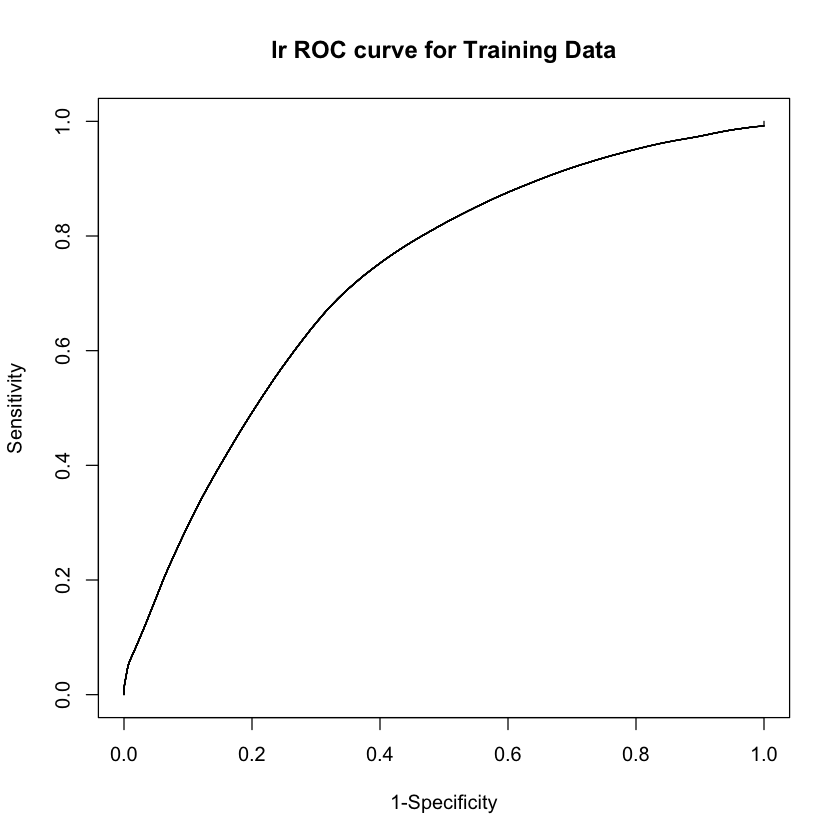

In [14]:
## ROC for training data
library(ROCR)
predict.train <- ROCR::prediction(lr.train.probs, dummydata$delq_sts.Y)
performance.train <- performance(predict.train, measure = "tpr", x.measure = "fpr")
plot(performance.train, main="lr ROC curve for Training Data", xlab = "1-Specificity", ylab="Sensitivity")

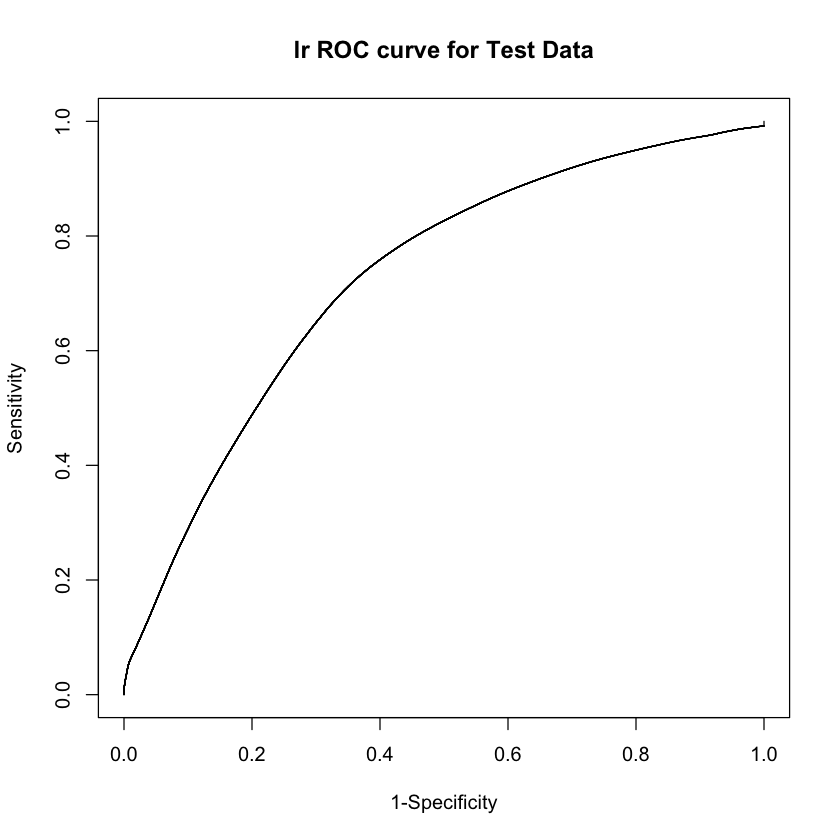

In [15]:
## ROC for test data
predict.test <- ROCR::prediction(lr.test.probs, testdata$delq_sts.Y)
performance.test <- performance(predict.test, measure = "tpr", x.measure = "fpr")
plot(performance.test, main="lr ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 4. Classification Tree

## 4.1 Build Model

In [16]:
# Classification Tree
tree.traindata <- dummydata
tree.testdata <- testdata
tree.traindata$delq_sts.Y <- factor(tree.traindata$delq_sts.Y, levels=c(0, 1), labels = c("N", "Y"))
tree.testdata$delq_sts.Y <- factor(tree.testdata$delq_sts.Y, levels=c(0, 1), labels = c("N", "Y"))
table(tree.testdata$delq_sts.Y)


      N       Y 
1360357 1360357 


Classification tree:
tree(formula = delq_sts.Y ~ ., data = tree.traindata)
Variables actually used in tree construction:
[1] "loan_age"   "mths_remng"
Number of terminal nodes:  4 
Residual mean deviance:  1.226 = 2679000 / 2185000 
Misclassification error rate: 0.3176 = 694030 / 2185408 

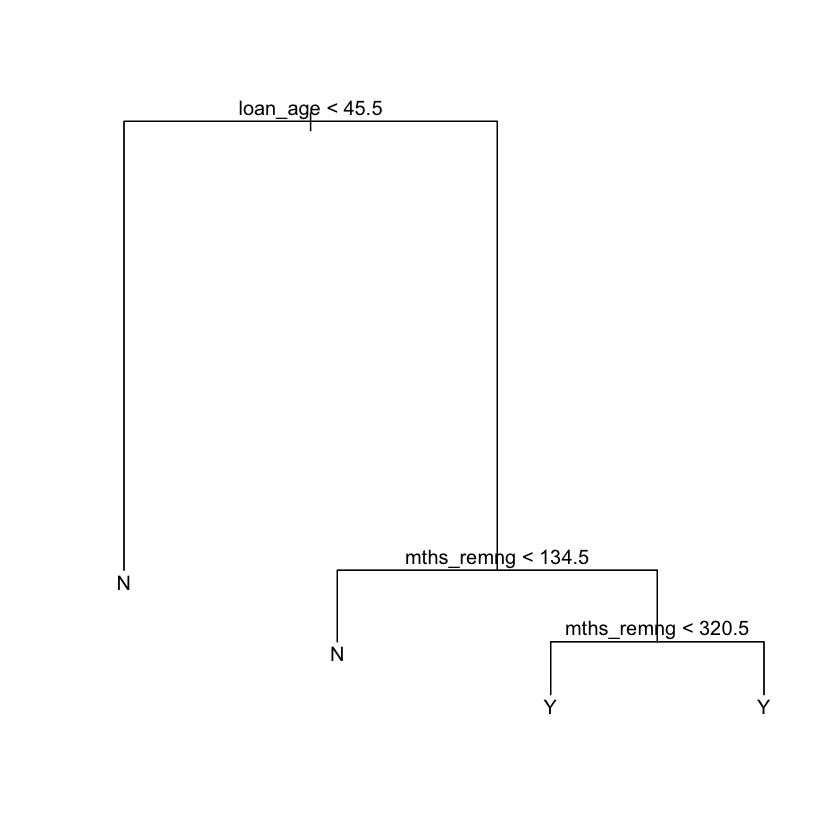

In [17]:
library(tree)
tree = tree(delq_sts.Y ~ ., tree.traindata)
summary(tree)
plot(tree)
text(tree, pretty = 0)

## 4.2 Evaluation (Tree)

### 4.2.1 Confusion Matrix

In [18]:
# Evaluation
## Confusion Matrix
tree.pred = predict(tree, tree.testdata, type = "class")
confusionMatrix(tree.pred, tree.testdata$delq_sts.Y)
#           Reference
# Prediction      N      Y
#          N 278002  13609
#          Y      0      0
# Accuracy : 0.9533317
# Really bad, right?

Confusion Matrix and Statistics

          Reference
Prediction      N      Y
         N 879896 380153
         Y 480461 980204
                                          
               Accuracy : 0.6837          
                 95% CI : (0.6831, 0.6842)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3674          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6468          
            Specificity : 0.7205          
         Pos Pred Value : 0.6983          
         Neg Pred Value : 0.6711          
             Prevalence : 0.5000          
         Detection Rate : 0.3234          
   Detection Prevalence : 0.4631          
      Balanced Accuracy : 0.6837          
                                          
       'Positive' Class : N               
                                          

### 4.2.2 ROC

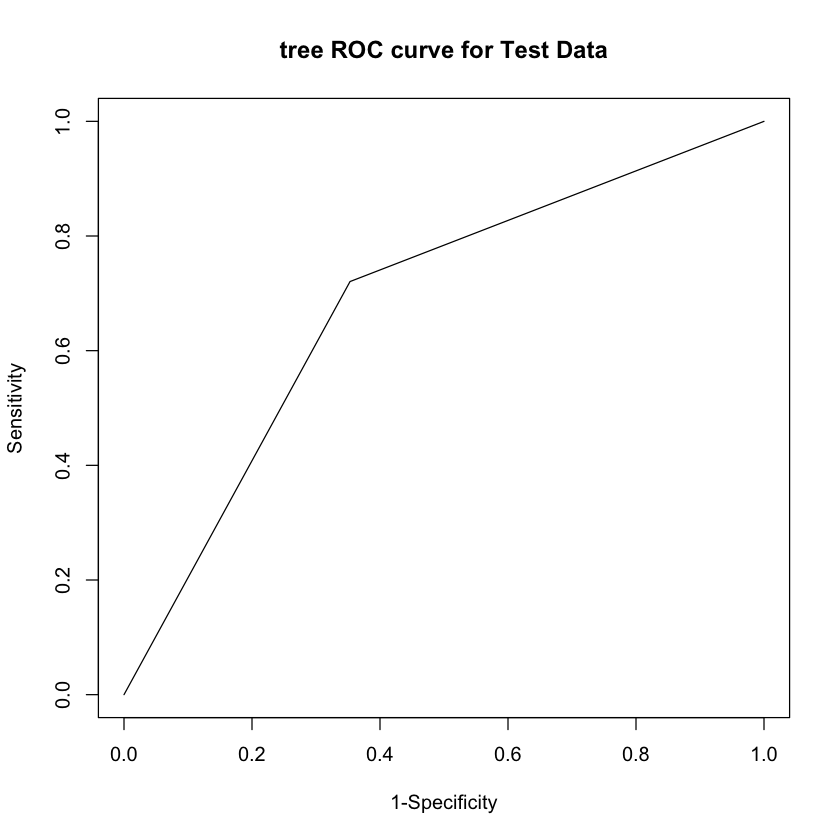

In [19]:
## ROC for test data
predict.tree.test <- ROCR::prediction(as.numeric(tree.pred), tree.testdata$delq_sts.Y)
performance.tree.test <- performance(predict.tree.test, measure = "tpr", x.measure = "fpr")
plot(performance.tree.test, main="tree ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 5. Neural Network (Too Slow)

## 5.1 Build Model

In [ ]:
# Neural Network
# This step will take a long time
library(neuralnet)
## all variables
n <- names(dummydata)
f <- as.formula(paste("delq_sts.Y ~", paste(n[!n %in% "delq_sts.Y"], collapse = " + ")))
neuralnet <- neuralnet(f, data = dummydata, hidden=3, err.fct="sse", linear.output = FALSE)
# plot(neuralnet)

## 5.2 Evaluation (Net)

### 5.2.1 Confusion Matrix

In [20]:
## Evaluation
net.pred <- compute(neuralnet, testdata[,-16])
net.result <- net.pred$net.result

## Confusion Matrix
net.test.pred <- rep(0, length(net.result))
### Set the cutoff value to 0.5
net.test.pred[net.result >= 0.5] <- 1
library(caret)
confusionMatrix(net.test.pred, testdata$delq_sts.Y)
#           Reference
# Prediction      0      1
#          0 278001  13411
#          1      1    198
# Accuracy : 0.9540072

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1907064   91612
         1      11    1313
                                                  
               Accuracy : 0.9541885               
                 95% CI : (0.9538978, 0.9544779)  
    No Information Rate : 0.9535375               
    P-Value [Acc > NIR] : 0.000005891953          
                                                  
                  Kappa : 0.0265917               
 Mcnemar's Test P-Value : < 0.00000000000000022204
                                                  
            Sensitivity : 0.99999423              
            Specificity : 0.01412967              
         Pos Pred Value : 0.95416366              
         Neg Pred Value : 0.99169184              
             Prevalence : 0.95353750              
         Detection Rate : 0.95353200              
   Detection Prevalence : 0.99933800              
      Balanced Accuracy : 0.50706195              

### 5.2.2 ROC

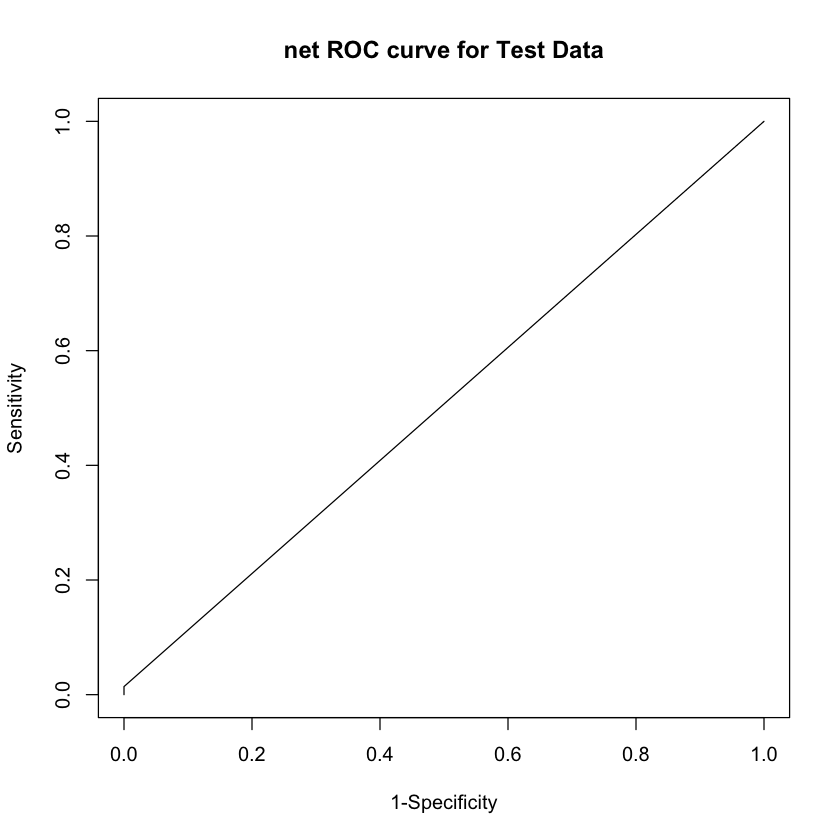

In [21]:
## ROC
## Bad ROC curve
predict.net.test <- ROCR::prediction(net.result, testdata$delq_sts.Y)
performance.net.test <- performance(predict.net.test, measure = "tpr", x.measure = "fpr")
plot(performance.net.test, main="net ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 6. Random Forest (too slow using only 1%)

## 6.1 Build Forest

In [24]:
# Random Forest
# install.packages("randomForest")
library(randomForest)

In [25]:
# sampling (1%) for dummydata
smp_size <- floor(0.01 * nrow(dummydata))
set.seed(21)
index <- sample(1:nrow(dummydata), size = smp_size)
forest.dummydata <- dummydata[index, ]
# sampling (1%) for testdata
smp_size <- floor(0.01 * nrow(testdata))
set.seed(21)
index <- sample(1:nrow(testdata), size = smp_size)
forest.testdata <- testdata[index, ]

In [26]:
## Create Forest
forest <- randomForest(as.factor(delq_sts.Y)~., forest.dummydata)
forest


Call:
 randomForest(formula = as.factor(delq_sts.Y) ~ ., data = forest.dummydata) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 30.15%
Confusion matrix:
     0    1  class.error
0 7231 3829 0.3462025316
1 2761 8033 0.2557902538

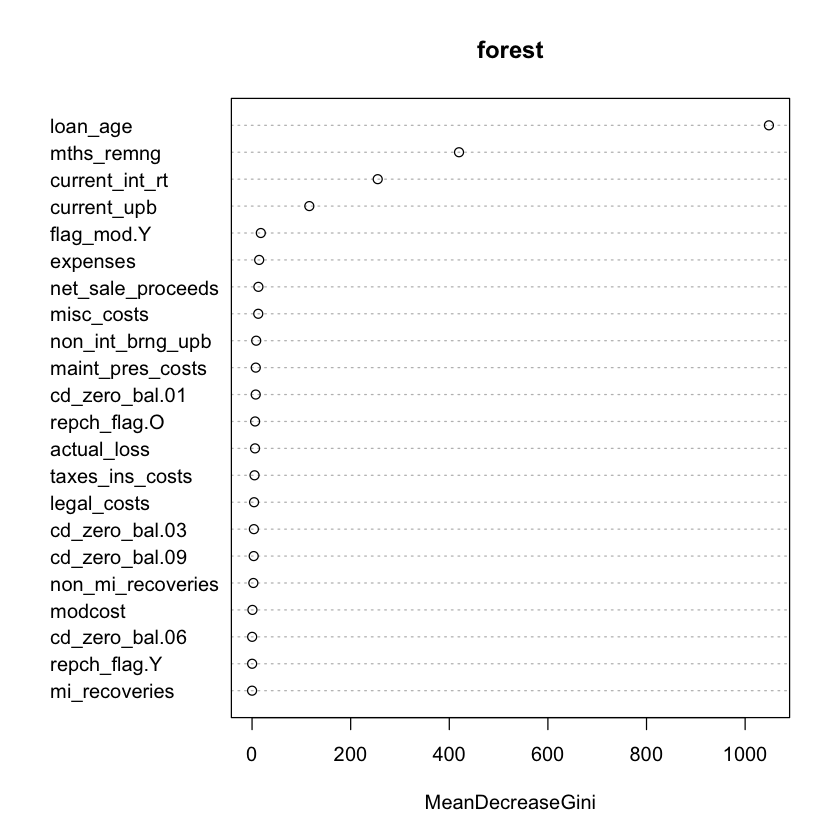

In [27]:
# variable importance
varImpPlot(forest)
## plot
# plot(random.delq_sts.Y)

## 6.2 Evaluation (Forest)

In [28]:
## Evaluation of Random Forest
library(caret)
## Confusion Matrix
forest.pred = predict(forest, forest.testdata, type = "class")
confusionMatrix(forest.pred, forest.testdata$delq_sts.Y)
#           Reference
# Prediction     0     1
#          0 19075   919
#          1     0     6
# Accuracy : 0.954

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0  8710  3276
         1  4962 10259
                                                  
               Accuracy : 0.6972103               
                 95% CI : (0.6917115, 0.702667)   
    No Information Rate : 0.5025177               
    P-Value [Acc > NIR] : < 0.00000000000000022204
                                                  
                  Kappa : 0.3947829               
 Mcnemar's Test P-Value : < 0.00000000000000022204
                                                  
            Sensitivity : 0.6370685               
            Specificity : 0.7579608               
         Pos Pred Value : 0.7266811               
         Neg Pred Value : 0.6740030               
             Prevalence : 0.5025177               
         Detection Rate : 0.3201382               
   Detection Prevalence : 0.4405484               
      Balanced Accuracy : 0.6975147               
           

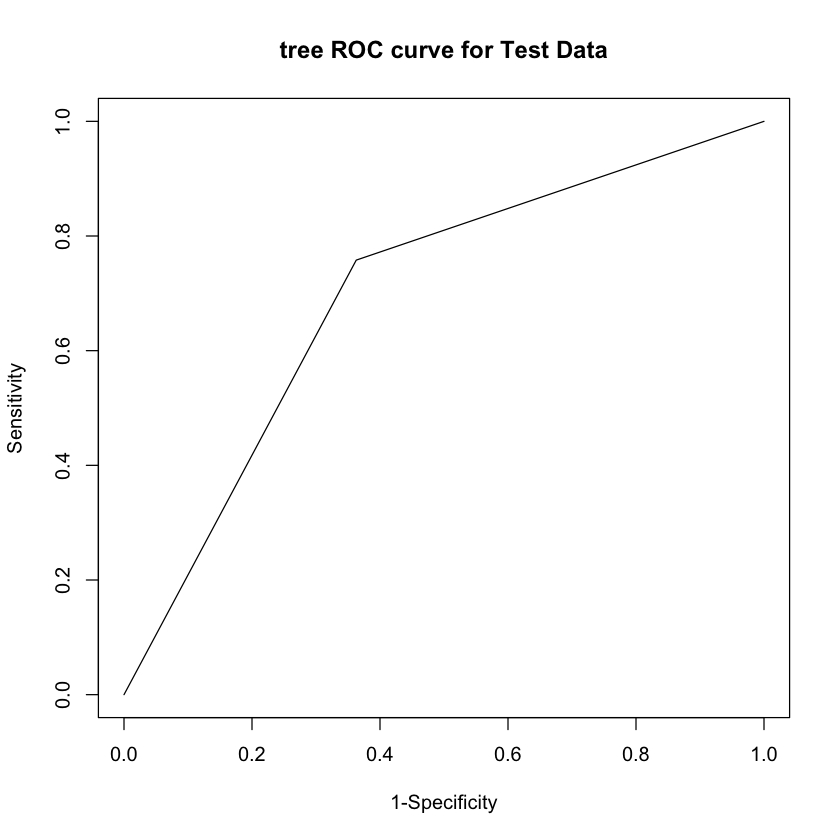

In [29]:
## ROC for test data
library(ROCR)
predict.forest.test <- ROCR::prediction(as.numeric(forest.pred), forest.testdata$delq_sts.Y)
performance.forest.test <- ROCR::performance(predict.forest.test, measure = "tpr",  x.measure = "fpr")
ROCR::plot(performance.forest.test, main="tree ROC curve for Test Data", xlab = "1-Specificity", ylab="Sensitivity")

# 7. Auto-Classification from 1999 to 2016

In [30]:
source("Classification_preprocess_equal.R")
source("Classification_auto.R")

In [31]:
# Test for Q12005 and Q22005
# Test demo
Q12005_Q22005 <- auto_classification("Q1", "2005", "Q2", "2005", 0.01)
Q12005_Q22005

Read 25884838 rows and 23 (of 23) columns from 1.454 GB file in 00:00:41
Read 29161109 rows and 23 (of 23) columns from 1.638 GB file in 00:00:43


,actual_delq,predict_delq,records,proper_delq,improper_delq
Q22005,1360357,1309559,2720714,893515,416044


In [24]:
# Simply run this block will output a csv file named "result_99to16_2M.csv"
# source("Classification_99to16.R")